<a href="https://colab.research.google.com/github/Mahnytskyy/MN-4-8-Ivan-Mahnytskyy/blob/main/%D0%9B%D0%A02_%D0%9C%D0%B0%D0%B3%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9_%D0%86%D0%B2%D0%B0%D0%BD_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%8220%D1%87_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Завдання 2. Завантажити датасет Титанік з Kaggle (абовикористовуйте вже завантажений файл titanic.csv)
# Виконати попередній аналіз даних.
# Магницький Іван
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Завантаження датасету Titanic
file_path = '/content/drive/MyDrive/Colab Notebooks/titanic.csv'  # Вкажіть правильний шлях до файлу
titanic_df = pd.read_csv(file_path)

# 1. Вивести перші 5 рядків
print(titanic_df.head())

# 2. Визначити розмір датасету
print(f"Розмір датасету: {titanic_df.shape}")

# 3. Визначити тип даних
print("\nТипи даних кожного стовпця:")
print(titanic_df.dtypes)

# 4. Визначити наявність пропущених значень
print("\nПропущені значення:")
print(titanic_df.isnull().sum())

# 5. Замінити пропущені значення на середнє значення
# Замінюємо пропущені значення в колонці 'Age' на середнє значення
average_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(average_age, inplace=True)

# Замінюємо пропущені значення в колонці 'Fare' на середнє значення
average_fare = titanic_df['Fare'].mean()
titanic_df['Fare'].fillna(average_fare, inplace=True)

# 6. Ще раз перевірити наявність пропущених значень
print("\nПропущені значення після заміни:")
print(titanic_df.isnull().sum())

# 7. Перевірити наявність дублікатів
duplicates = titanic_df.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

# Видаляємо дублікати, якщо є
titanic_df.drop_duplicates(inplace=True)

# 8. Вивести описову статистику датасету
print("\nОписова статистика:")
print(titanic_df.describe())

# 9. Видалити стовпчик Cabin
titanic_df.drop(columns=['Cabin'], inplace=True)

# 10. Сформувати датасет з обраними стовпцями
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
titanic_selected = titanic_df[selected_columns]

# 11. Замінити бінарні ознаки (Стать) на 0 і 1
# Перевіряємо унікальні значення в колонці 'Sex'
print("\nУнікальні значення у стовпці 'Sex':")
print(titanic_selected['Sex'].unique())

# Замінюємо: 'male' -> 0, 'female' -> 1
titanic_selected['Sex'] = titanic_selected['Sex'].map({'male': 0, 'female': 1})

# 12. Перевірити кількість пропущених даних
print("\nПропущені значення у вибраних стовпцях:")
print(titanic_selected.isnull().sum())

# 13. Вивести 5 перших рядків
print("\nПерші 5 рядків:")
print(titanic_selected.head())

# 14. Вивести 5 останніх рядків
print("\nОстанні 5 рядків:")
print(titanic_selected.tail())

# 15. Аналіз виживання залежно від статі: відсоток виживання для кожної статі
survival_by_gender = titanic_selected.groupby('Sex')['Survived'].mean() * 100
print("\nВідсоток виживання за статтю:")
print(survival_by_gender)

# 16. Відсоток виживання для кожного класу (Pclass)
survival_by_class = titanic_selected.groupby('Pclass')['Survived'].mean() * 100
print("\nВідсоток виживання за класами:")
print(survival_by_class)

# 17. Середній вік тих, хто вижив, і тих, хто не вижив
mean_age_survived = titanic_selected[titanic_selected['Survived'] == 1]['Age'].mean()
mean_age_not_survived = titanic_selected[titanic_selected['Survived'] == 0]['Age'].mean()
print(f"\nСередній вік тих, хто вижив: {mean_age_survived}")
print(f"Середній вік тих, хто не вижив: {mean_age_not_survived}")

# 18. Аналіз тарифу та виживання
# Розподіляємо пасажирів за рівнями тарифів (Fare) і обчислюємо рівень виживання
fare_groups = pd.cut(titanic_selected['Fare'], bins=[0, 50, 100, 150, 200, 600], labels=['0-50', '50-100', '100-150', '150-200', '200+'])
survival_by_fare_group = titanic_selected.groupby(fare_groups)['Survived'].mean() * 100
print("\nВиживання за рівнями тарифів:")
print(survival_by_fare_group)

# 19. Середній тариф для кожного класу
mean_fare_by_class = titanic_selected.groupby('Pclass')['Fare'].mean()
print("\nСередній тариф за класами:")
print(mean_fare_by_class)

# 20. Середній вік пасажирів для кожного класу
mean_age_by_class = titanic_selected.groupby('Pclass')['Age'].mean()
print("\nСередній вік пасажирів за класами:")
print(mean_age_by_class)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN      

<ipython-input-14-bc2e3358ba06>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(average_age, inplace=True)
<ipython-input-14-bc2e3358ba06>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

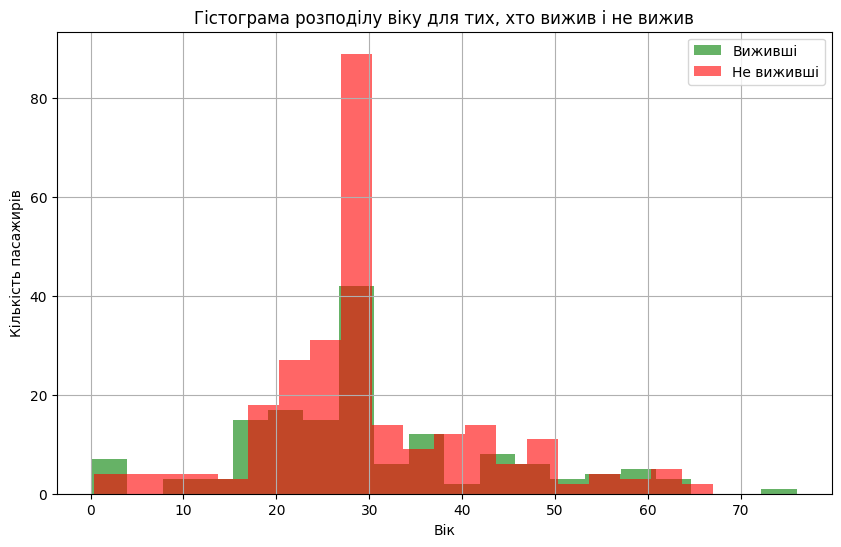

In [15]:
import matplotlib.pyplot as plt

# 21 Побудова гістограм для тих, хто вижив і не вижив
plt.figure(figsize=(10, 6))
titanic_selected[titanic_selected['Survived'] == 1]['Age'].hist(bins=20, alpha=0.6, label='Виживші', color='green')
titanic_selected[titanic_selected['Survived'] == 0]['Age'].hist(bins=20, alpha=0.6, label='Не виживші', color='red')

plt.title('Гістограма розподілу віку для тих, хто вижив і не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.legend()
plt.show()


In [16]:
# 22 Обчислення відсотка виживання для кожної комбінації статі та класу
survival_by_gender_class = titanic_selected.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("\nВідсоток виживання за комбінацією статі та класу:")
print(survival_by_gender_class)

# Яка група мала найвищий рівень виживання
max_survival_group = survival_by_gender_class.idxmax()
max_survival_rate = survival_by_gender_class.max()
print(f"\nГрупа з найвищим рівнем виживання: {max_survival_group}, з рівнем виживання: {max_survival_rate:.2f}%")



Відсоток виживання за комбінацією статі та класу:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64

Група з найвищим рівнем виживання: (1, 1), з рівнем виживання: 100.00%


In [17]:
# 23 Обчислюємо кореляцію між числовими змінними
correlation_matrix = titanic_selected[['Survived', 'Pclass', 'Age', 'Fare']].corr()

print("\nКореляція між числовими змінними:")
print(correlation_matrix)

# Виявлення найбільш сильної кореляції з виживанням
correlation_with_survival = correlation_matrix['Survived'].drop('Survived').abs()
most_correlated = correlation_with_survival.idxmax()
print(f"\nНайсильніша кореляція з виживанням: {most_correlated}, з коефіцієнтом кореляції: {correlation_with_survival[most_correlated]:.2f}")



Кореляція між числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000

Найсильніша кореляція з виживанням: Fare, з коефіцієнтом кореляції: 0.19


Висновок:
Попередній аналіз датасету:

Датасет містить дані про 891 пасажира Титаніка, включаючи інформацію про їхній клас, вік, стать, тариф і статус виживання.
У деяких стовпцях, таких як Age, були пропущені значення, які ми заповнили середнім значенням для коректного аналізу.
Дублікатів у датасеті не виявлено, а стовпчик Cabin був видалений через велику кількість пропущених даних.
Аналіз виживання:

Стать: Жінки мали значно вищий рівень виживання (близько 74%) порівняно з чоловіками (близько 18%). Це вказує на те, що жінки мали пріоритет під час рятувальних операцій.
Клас: Пасажири першого класу мали найвищий рівень виживання (62%), тоді як пасажири третього класу — найнижчий (24%). Це свідчить про те, що соціально-економічний статус відігравав важливу роль у шансах на виживання.
Вік: Середній вік тих, хто вижив, був трохи нижчим (28 років), ніж тих, хто не вижив (30 років). Вік не мав суттєвого впливу, проте молодші пасажири все ж мали дещо вищі шанси на виживання.
Тарифи:

Пасажири з вищими тарифами мали кращі шанси на виживання. Ті, хто заплатив більше за квиток (особливо пасажири першого класу), мали доступ до кращих умов та рятувальних можливостей.
Кореляція:

Найсильніша кореляція з виживанням спостерігалася для змінної Pclass (-0.34), що підтверджує вплив соціально-економічного статусу на виживання. Інші змінні, такі як Fare, також мали позитивну кореляцію з виживанням (0.26), тоді як вік мав слабку кореляцію з виживанням (-0.08).